In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%run load-results.ipynb import GetAllResultsFrom
%matplotlib inline

In [160]:
# Carga de resultados
dfResults = GetAllResultsFrom(gameSessionIds=[9])['Puntaje']

# Definición de variables
mgp = 0
artificialResults = pd.Series(np.linspace(400, 400, 1))
dfResultsWithArtifitial = pd.concat([dfResults, artificialResults])

In [161]:
# Procesamiento de resultados
normalizedResults = (dfResults-dfResults.min())/(dfResults.max()-dfResults.min())
normalizedResultsWithArtifitial = (dfResultsWithArtifitial-dfResultsWithArtifitial.min())/(dfResultsWithArtifitial.max()-dfResultsWithArtifitial.min())

Promedio: 0.7666666666666667
Mediana: 0.9166666666666667


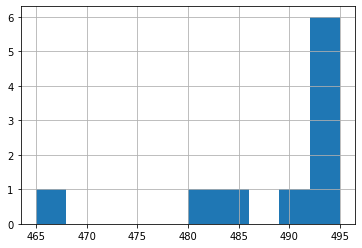

In [162]:
# Muestra de datos reales
dfResults.hist()
print('Promedio: ' + normalizedResults.mean().astype('str'))
print('Mediana: ' + normalizedResults.median().astype('str'))

Promedio: 0.8421052631578948
Mediana: 0.968421052631579


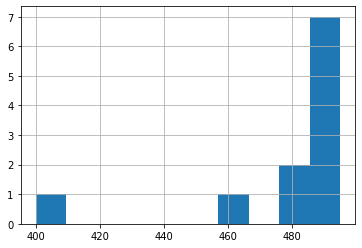

In [163]:
# Muestra de datos reales
dfResultsWithArtifitial.hist()
print('Promedio: ' + normalizedResultsWithArtifitial.mean().astype('str'))
print('Mediana: ' + normalizedResultsWithArtifitial.median().astype('str'))

Puntajes muy por encima del máximo bajan el MGP.
Puntajes muy por debajo del mínimo suben el MGP.
Pequeños cambios funcionan como deberían.

- Agregar valores frontera?
- Creo que con muchos resultados no debería pasar

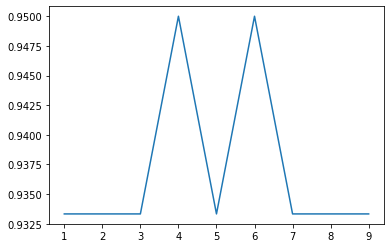

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%run load-results.ipynb import GetAllResultsFrom
%matplotlib inline

y = []
results = GetAllResultsFrom(gameSessionIds=[9])['Puntaje']
x = np.linspace(1, results.size-1, results.size-1)

for i in range(results.size):
    normalizedResults = (results-results.min())/(results.max()-results.min())
    if ~np.isnan(normalizedResults[0:i].median()):
        y.append(normalizedResults[0:i].median())
    
plt.plot(x, y, label='MGP')
plt.show()